In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('troop_movements.csv')

# Define features (X) and target variable (y)
X = data[['homeworld', 'unit_type']]  # Features: Gender, Age, City_Location
y = data['empire_or_resistance']  # Target variable

# Define preprocessing steps (OneHotEncoder for categorical features, StandardScaler for numerical features)
categorical_features = ['homeworld', 'unit_type']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Initialize logistic regression classifier within a pipeline
clf = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the classifier
clf = clf.fit(X_train, y_train)

In [3]:
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.665


In [4]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(clf, file)

In [5]:
# get importances
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

In [6]:
feature_importances

,Feature,Importance
0,homeworld_Alderaan,0.052258
1,homeworld_Aleen Minor,0.006163
2,homeworld_Bestine IV,0.007463
3,homeworld_Cerea,0.009786
4,homeworld_Champala,0.006781
5,homeworld_Chandrila,0.014877
6,homeworld_Concord Dawn,0.005248
7,homeworld_Corellia,0.033227
8,homeworld_Dagobah,0.007442
9,homeworld_Dathomir,0.011862


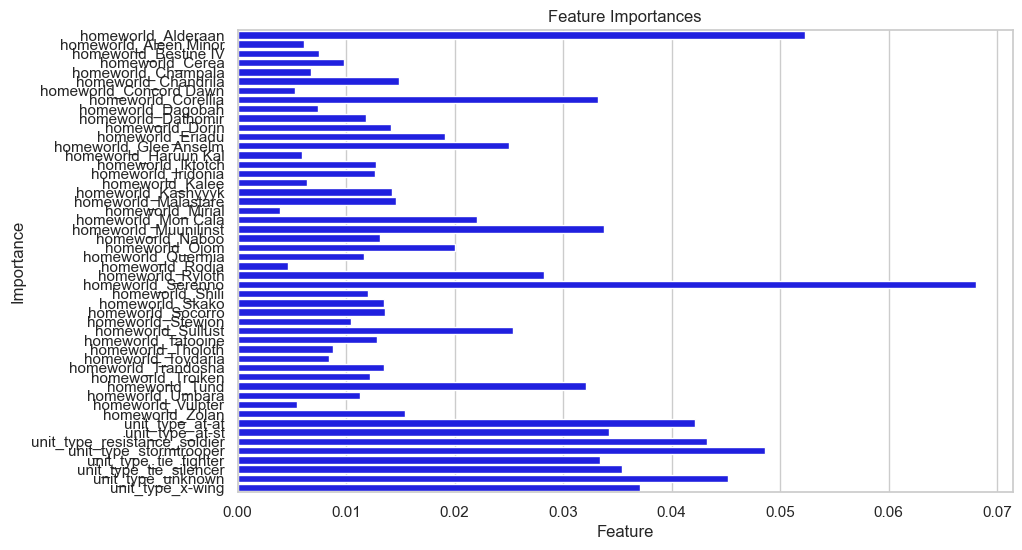

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], color='blue', orient="y")
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [9]:
df = pd.read_parquet('troop_movements_1m.parquet')
df.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [17]:
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [20]:
# Using pickled model and parquet df to predict values
X = df[['homeworld', 'unit_type']]  
df['predictions'] = False # make new row 


categorical_features = ['homeworld', 'unit_type']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# use model to predict 
y_pred = model.predict(X_encoded)

# put predictions in dataframe
df['predictions'] = y_pred # Target variable
df['predictions']

0             empire
1             empire
2             empire
3             empire
4             empire
             ...    
999995    resistance
999996        empire
999997    resistance
999998        empire
999999        empire
Name: predictions, Length: 1000000, dtype: object

In [22]:
# see how many of each prediction we have
df.groupby("predictions")["predictions"].count()

predictions
empire        533958
resistance    466042
Name: predictions, dtype: int64

In [23]:
df['predictions'] = (y_pred == 'resistance')
df.groupby("predictions")["predictions"].count()

predictions
False    533958
True     466042
Name: predictions, dtype: int64

In [24]:
df

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor,False
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare,False
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno,False
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund,False
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako,False
...,...,...,...,...,...,...,...,...,...
999995,2023-05-03 18:48:56,3553240,tie_fighter,8.0,4.0,8,1,Chandrila,True
999996,2023-05-25 13:45:35,1662636,at-at,0.0,3.0,8,6,Trandosha,False
999997,2023-05-17 12:16:37,2362262,tie_fighter,6.0,8.0,7,9,Kashyyyk,True
999998,2023-03-17 08:04:26,7669749,tie_fighter,9.0,3.0,3,5,Zolan,False
